<a href="https://colab.research.google.com/github/ZPavlo/ML_projects/blob/master/Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
PATH = "/content/gdrive/My Drive"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os 
import numpy as np
import scipy.signal as signal
import cv2

In [0]:
img = cv2.imread(os.path.join(PATH, "datasets/VOCdevkit/VOC2012/JPEGImages/2007_000175.jpg"))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


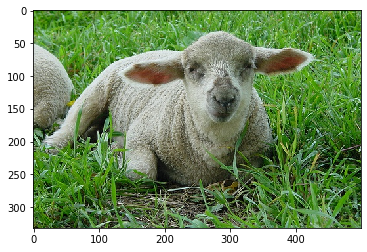

In [13]:
import matplotlib.pylab as plt

plt.imshow(img)

In [0]:
def my_mean(img, k = (3, 3)):
    f = np.ones(k)
    f = f / float(f.size)
    mean_img = []
    for i in range(img.shape[2]):
        mean_img.append(signal.convolve2d(img[..., i], f, boundary='symm', mode='same'))
    return np.transpose(np.stack(mean_img), (1, 2, 0)) .astype("uint8")

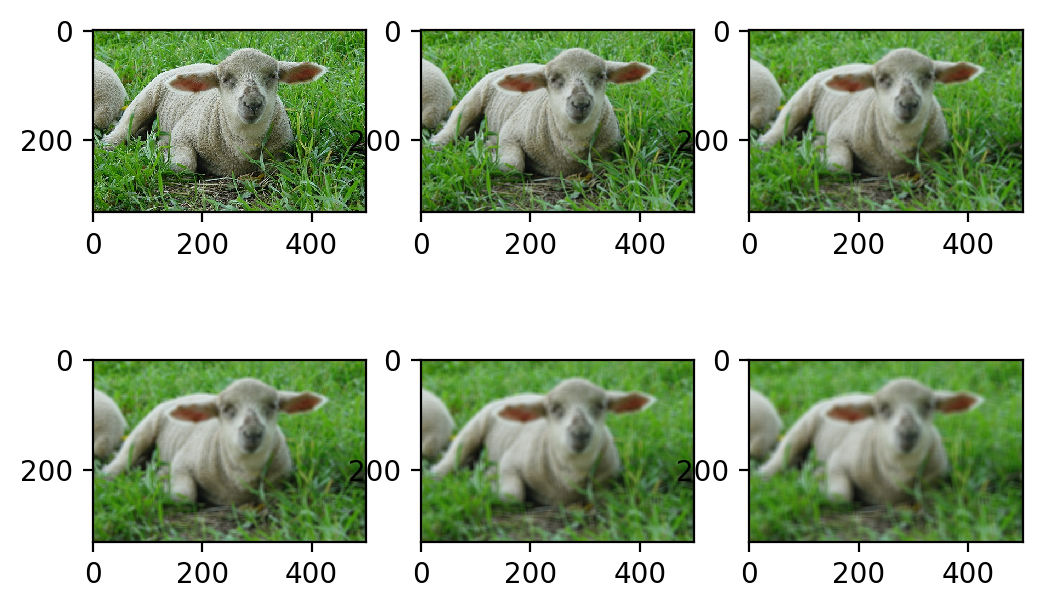

In [48]:
fig = plt.figure(dpi=200)
for i, kernel in enumerate([1, 3, 5, 7, 9, 11]):
    mn_img = my_mean(img, k = (kernel, kernel))
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(mn_img)

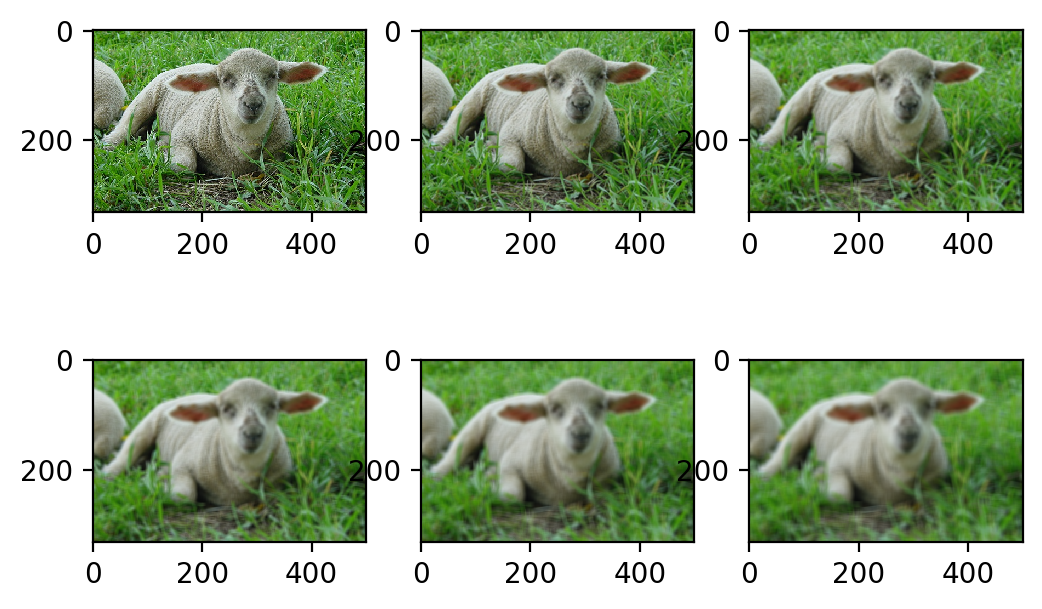

In [49]:
fig = plt.figure(dpi=200)
for i, kernel in enumerate([1, 3, 5, 7, 9, 11]):
    mn_img = cv2.blur(img, ksize = (kernel, kernel))
    ax = fig.add_subplot(2, 3, i+1)
    ax.imshow(mn_img)

In [0]:
import numpy as np
import os
import cv2
def noisy(image, noise_typ="gauss"):
  if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
  elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.01
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
  elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy
  elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy
  else:
      return image


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


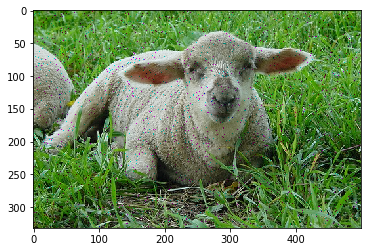

In [67]:
noisy_img = noisy(img, "s&p")
plt.imshow(noisy_img)

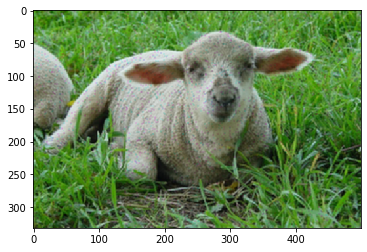

In [74]:
mean_noisy_img = cv2.blur(noisy_img, ksize = (3, 3))
plt.imshow(mean_noisy_img)

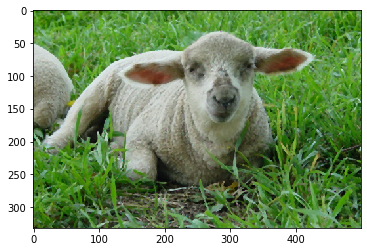

In [75]:
median_noisy_img = cv2.medianBlur(noisy_img, 3)
plt.imshow(median_noisy_img)